In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from collections import defaultdict

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import group_dataset_files, read_dataset_files
from src.utils.operation_helpers import run_models_synthetic,run_models, split_games
from sklearn.model_selection import train_test_split
from src.utils.c_operation_helpers import run_simulation

In [2]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = 'N-1000_M-1000_K-4_L-0_nodes.txt'
filein_data = 'N-1000_M-1000_K-4_L-0_edges.txt'


dataset_files = {
    'nodes':filein_idx, 
    'edges': filein_data
    }

data, pi_values = read_dataset_files(dataset_files, data_dir, is_synthetic=True)
results = defaultdict(list)

train_sizes = np.logspace(-1, 0, endpoint=False, num=15)
for train_size in train_sizes:
    train, test = split_games(data, train_size=train_size)
    df = run_models(train, test, pi_values)
    for model in df['model'].unique():
        results[model].append(df[df['model'] == model]['log-likelihoods'].values[0])


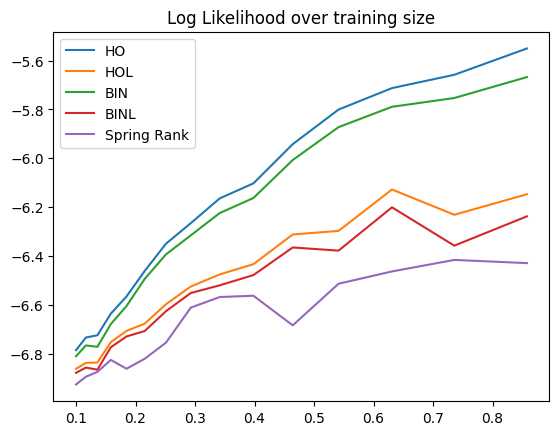

In [3]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO_BT'], label='HO')
plt.plot(train_sizes, results['HOL_BT'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )
plt.plot(train_sizes, results['Spring_Rank'], label='Spring Rank')
# plt.plot(train_sizes, results['Page_Rank'], label='Page_Rank')
plt.legend()


In [4]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')
grouped = group_dataset_files(data_dir)

data, pi_values = read_dataset_files(grouped['00009'], data_dir, is_synthetic=False)

results = defaultdict(list)


train_sizes = np.logspace(-2, 0, endpoint=False, num=15)
for train_size in train_sizes:
    
    train, test = split_games(data, train_size=train_size)
    df = run_models(train, test, pi_values)
    for model in df['model'].unique():
        results[model].append(float(df[df['model'] == model]['log-likelihoods'].values[0]))



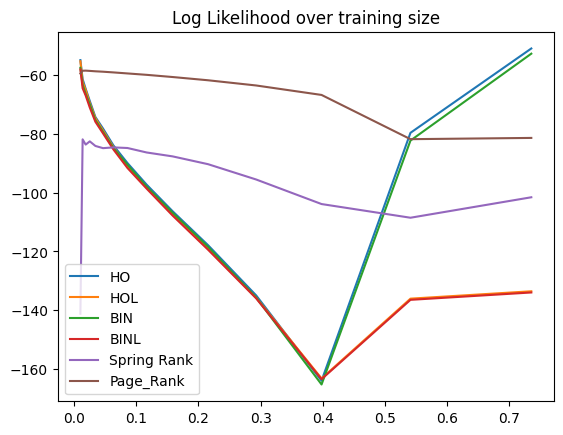

In [5]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO_BT'], label='HO')
plt.plot(train_sizes, results['HOL_BT'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )
plt.plot(train_sizes, results['Spring_Rank'], label='Spring Rank')
plt.plot(train_sizes, results['Page_Rank'], label='Page_Rank')
plt.legend()

In [6]:
data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = 'N-1000_M-1000_K-4_L-0_nodes.txt'
filein_data = 'N-1000_M-1000_K-4_L-0_edges.txt'

idx_path = os.path.join(data_dir, filein_idx)
data_path = os.path.join(data_dir, filein_data)

results = defaultdict(list)
train_sizes = np.logspace(-1, 0, endpoint=False, num=15)
for train_size in train_sizes:

    df = run_simulation(idx_path, data_path, train_size, is_synthetic=1)
    for model in df['model'].unique():
        results[model].append(float(df[df['model'] == model]['HO_Like'].values[0]))


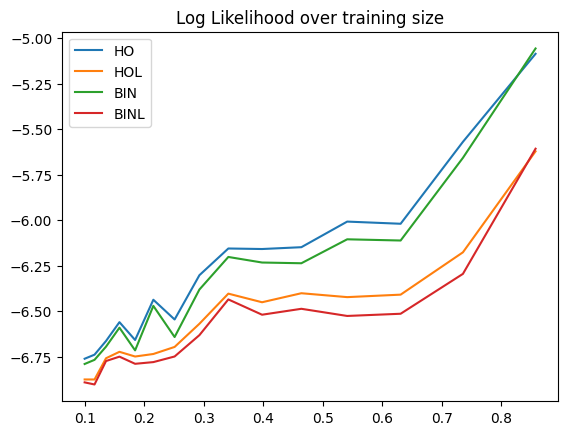

In [7]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO'], label='HO')
plt.plot(train_sizes, results['HOL'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )
plt.legend()

In [8]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')

filein_idx = '00009_nodes.txt'
filein_data = '00009_edges.txt'

idx_path = os.path.join(data_dir, filein_idx)
data_path = os.path.join(data_dir, filein_data)

results = defaultdict(list)
train_sizes = np.logspace(-1, 0, endpoint=False, num=15)
for train_size in train_sizes:

    df = run_simulation(idx_path, data_path, train_size, is_synthetic=0)
    
    for model in df['model'].unique():
        results[model].append(float(df[df['model'] == model]['HO_Like'].values[0]))


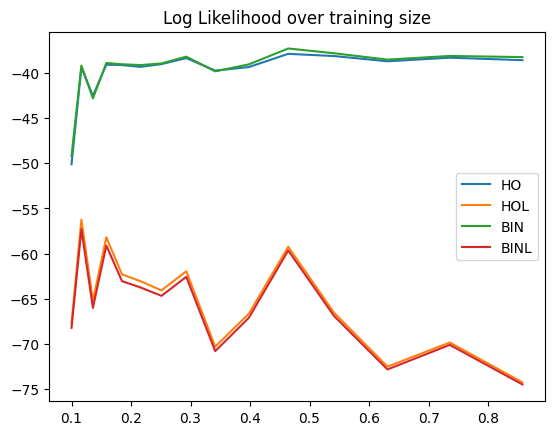

In [9]:
plt.title('Log Likelihood over training size')
plt.plot(train_sizes, results['HO'], label='HO')
plt.plot(train_sizes, results['HOL'], label='HOL')
plt.plot(train_sizes,results['BIN'], label='BIN' )
plt.plot(train_sizes,results['BINL'], label='BINL' )
plt.legend()